In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from copy import copy

In [115]:
data = pd.read_csv('dataset.csv')

In [116]:
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [117]:
data = data.drop(data.columns[0], axis=1)
data
data.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [118]:
non_string_artists = [(artist, idx+1) for idx, artist in enumerate(data['artists']) 
                     if not isinstance(artist, str)]

for artist, idx in non_string_artists:
    print(artist, idx)
       
data.iloc[65900]

data = data.dropna()



nan 65901


In [119]:
data.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [120]:
data['explicit'] = data['explicit'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  int64  
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

In [121]:
def ms_to_min(x):
    return round(x/60000, 1)

data['duration_ms'] = data['duration_ms'].apply(ms_to_min)


data = data.rename(columns={'duration_ms' : 'duration_min'})

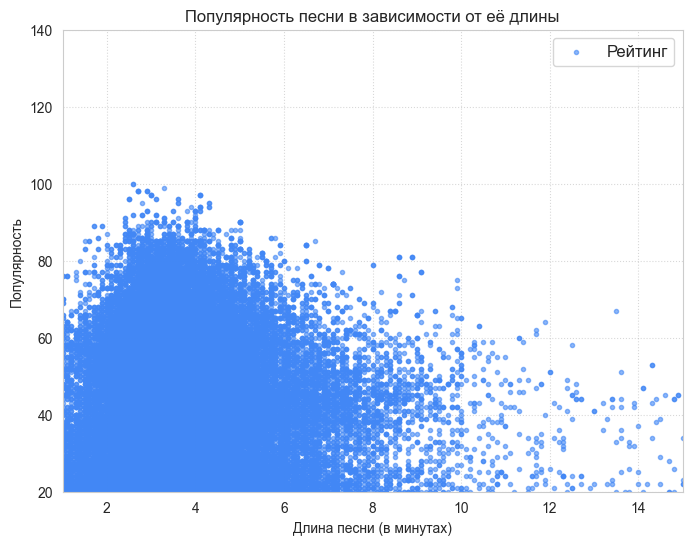

In [122]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('whitegrid')

# Построение точечной диаграммы
ax.scatter(data['duration_min'], data['popularity'], marker='.', color='#4287f5', alpha=0.6, label='Рейтинг')

# Настройка вспомогательных линий
ax.grid(True, linestyle=':', alpha=0.3, color='gray')

# Установка пределов по осям
ax.set_xlim(1, 15)
ax.set_ylim(20, 140)  # Отображаем только относително популярные песни

ax.set_xlabel('Длина песни (в минутах)')
ax.set_ylabel('Популярность')
ax.set_title('Популярность песни в зависимости от её длины')

ax.legend(fontsize=12)
plt.show()

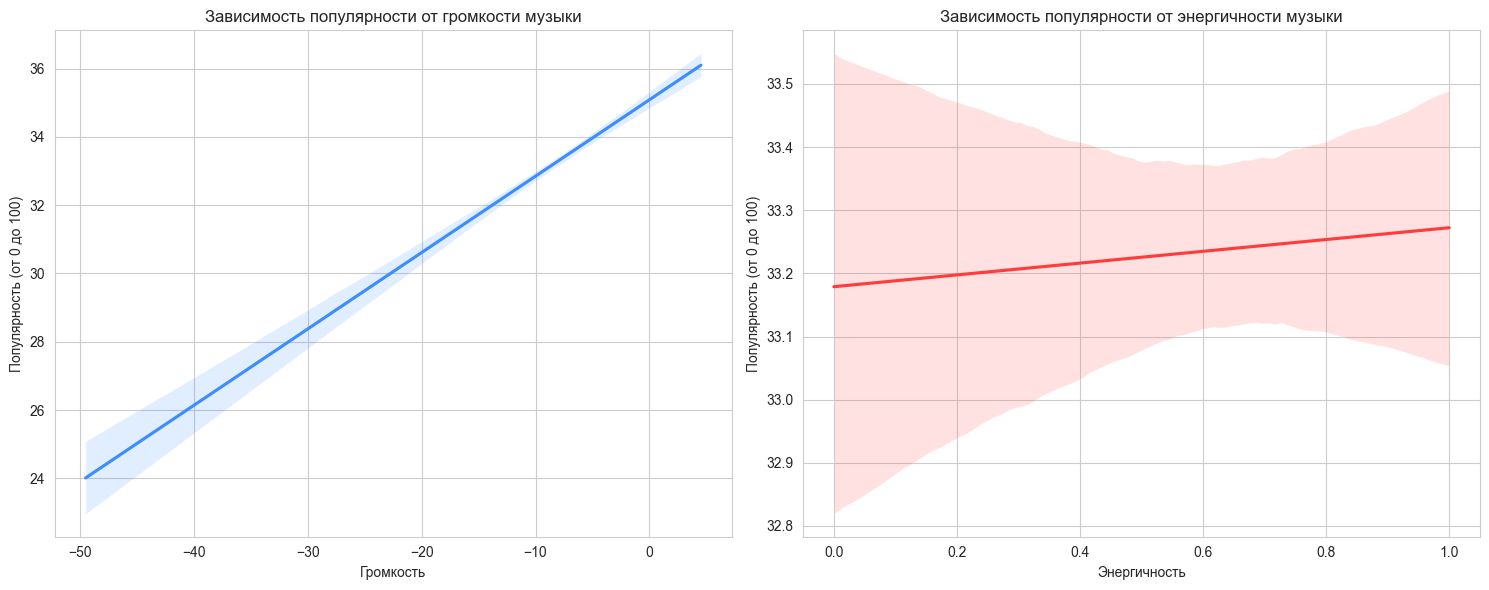

In [123]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


sns.regplot(x='loudness', y='popularity', data=data, scatter=False, color="#3c8eff", ax=ax1)
ax1.set_title('Зависимость популярности от громкости музыки')
ax1.set_xlabel('Громкость')
ax1.set_ylabel('Популярность (от 0 до 100)')


sns.regplot(x='energy', y='popularity', data=data, scatter=False, color="#ff3c3c", ax=ax2)
ax2.set_title('Зависимость популярности от энергичности музыки')
ax2.set_xlabel('Энергичность')
ax2.set_ylabel('Популярность (от 0 до 100)')


plt.tight_layout()
plt.show()

In [124]:
clean = copy(data)

categorical_cols = clean.select_dtypes(include=['object']).columns

label_encoders = {}

for column in categorical_cols:
    encoder = LabelEncoder()
    clean[column] = encoder.fit_transform(clean[column])
    label_encoders[column] = encoder

In [125]:
from sklearn.model_selection import train_test_split

x = clean.drop(columns=['popularity'])
y = clean['duration_min']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [126]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
aboba = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred = model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Epoch 1/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 1.1265 - val_loss: 0.0161
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0110 - val_loss: 0.0050
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0041 - val_loss: 0.0120
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 9.9450e-04 - val_loss: 7.4097e-04
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0010 - val_loss: 3.8487e-04
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0011 - val_loss: 1.6643e-04
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 6.0889e-04 - val_loss: 5.4043e-04
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 5.9867e-04 - val_loss: 1.3378e-04
Epoch 10/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0011 - val_loss: 4.9547e-04
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step
MAE: 0.016360647835229572
MSE: 0.0005075